In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:

df = pd.read_excel("PD.xlsx")

# Convertir las columnas de fecha y hora a un solo datetime
df["fecha_hora"] = pd.to_datetime(df["Fecha"].astype(str) + " " + df["Hora"].astype(str))

# Ordenar por fecha y hora (por si no lo está)
df = df.sort_values("fecha_hora")

# Variables: precio actual y precio siguiente
df["venta_siguiente"] = df["Venta paralela"].shift(-1)  # desplazar una fila hacia arriba

# Eliminar la última fila (que tendrá NaN en venta_siguiente)
df = df.dropna()

# X y y para regresión
x = df["Venta paralela"].values
y = df["venta_siguiente"].values

# Calcular medias
x_mean = np.mean(x)
y_mean = np.mean(y)

# Pendiente m
m = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)

# Intercepto b
b = y_mean - m * x_mean

# Predicción para el siguiente registro después del último valor
ultimo_valor = df["Venta paralela"].iloc[-1]
prediccion = m * ultimo_valor + b

print(f"Pendiente (m): {m}")
print(f"Intercepto (b): {b}")
print(f"Predicción para el próximo registro (15 min después): {prediccion}")


Pendiente (m): 0.9998241207095628
Intercepto (b): 0.0023284327970873875
Predicción para el próximo registro (15 min después): 13.939876675488392


In [3]:
# Leer el Excel
df = pd.read_excel("PD.xlsx")

# Combinar fecha y hora
df["fecha_hora"] = pd.to_datetime(df["Fecha"].astype(str) + " " + df["Hora"].astype(str))
df = df.sort_values("fecha_hora")

# Variable objetivo: precio en el siguiente registro
df["venta_siguiente"] = df["Venta paralela"].shift(-1)
df = df.dropna()

# Datos para regresión
x = df["Venta paralela"].values
y = df["venta_siguiente"].values

# Calcular pendiente e intercepto
x_mean = np.mean(x)
y_mean = np.mean(y)
m = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
b = y_mean - m * x_mean

# Predicciones para N días después
N_dias = 4
pasos = N_dias * 96  # registros por día

valor_actual = df["Venta paralela"].iloc[-1]
predicciones = []

for _ in range(pasos):
    valor_actual = m * valor_actual + b  # predicción siguiente
    predicciones.append(valor_actual)

# Mostrar las primeras 10 predicciones
print(predicciones[:10])

# Mostrar la última predicción (N días después)
print(f"Predicción para {N_dias} días después: {predicciones[-1]}")


[np.float64(13.939876675488392), np.float64(13.939753372667013), np.float64(13.939630091532047), np.float64(13.93950683207968), np.float64(13.939383594306097), np.float64(13.939260378207486), np.float64(13.939137183780035), np.float64(13.939014011019934), np.float64(13.938890859923369), np.float64(13.938767730486532)]
Predicción para 4 días después: 13.89420326984175


<Figure size 1200x800 with 0 Axes>

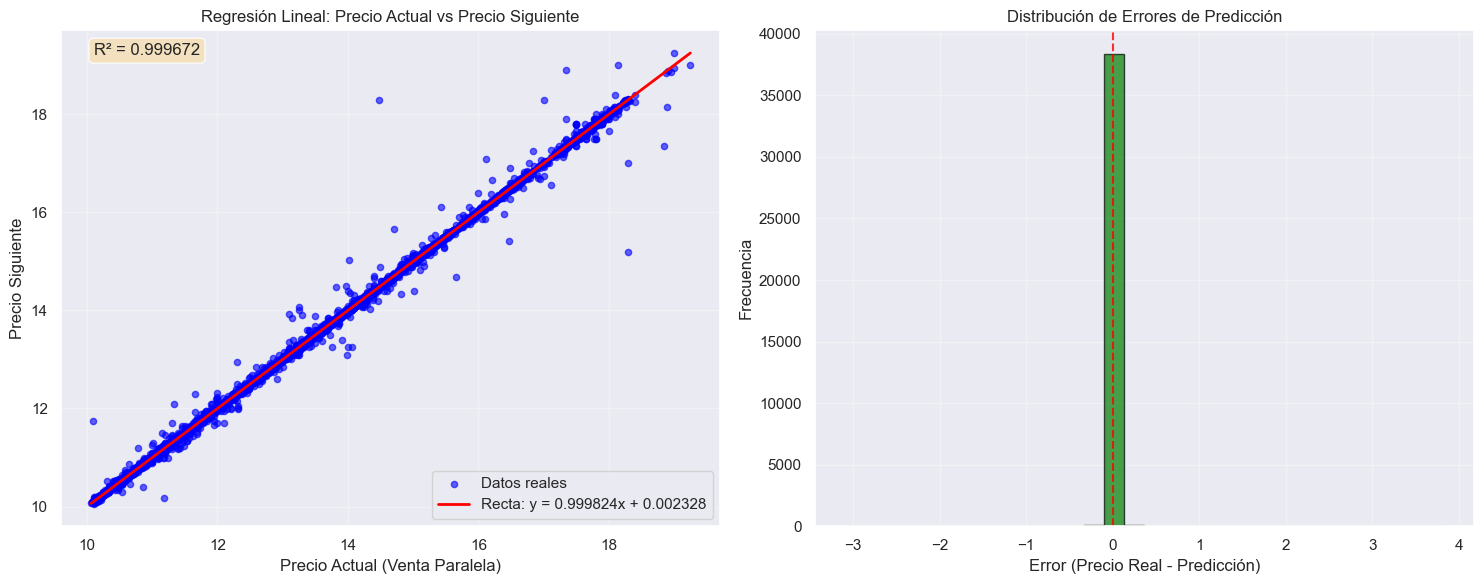

Coeficiente de determinación (R²): 0.999672
Error cuadrático medio: 0.041297
Error absoluto medio: 0.007132


In [ ]:
# Gráfica 1: Recta de regresión - Relación entre precio actual y siguiente
plt.figure(figsize=(12, 8))

# Crear subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Recta de regresión
ax1.scatter(x, y, alpha=0.6, color='blue', s=20, label='Datos reales')
x_line = np.linspace(x.min(), x.max(), 100)
y_line = m * x_line + b
ax1.plot(x_line, y_line, color='red', linewidth=2, label=f'Recta: y = {m:.6f}x + {b:.6f}')
ax1.set_xlabel('Precio Actual (Venta Paralela)')
ax1.set_ylabel('Precio Siguiente')
ax1.set_title('Regresión Lineal: Precio Actual vs Precio Siguiente')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Calcular R²
y_pred_regression = m * x + b
ss_res = np.sum((y - y_pred_regression) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
ax1.text(0.05, 0.95, f'R² = {r_squared:.6f}', transform=ax1.transAxes, 
         bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# Subplot 2: Distribución de errores
errores = y - y_pred_regression
ax2.hist(errores, bins=30, alpha=0.7, color='green', edgecolor='black')
ax2.set_xlabel('Error (Precio Real - Predicción)')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Distribución de Errores de Predicción')
ax2.axvline(x=0, color='red', linestyle='--', alpha=0.8)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Coeficiente de determinación (R²): {r_squared:.6f}")
print(f"Error cuadrático medio: {np.sqrt(np.mean(errores**2)):.6f}")
print(f"Error absoluto medio: {np.mean(np.abs(errores)):.6f}")